In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('../../datasets/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [17]:
df_usage = df.groupby('Usage')
df_usage.count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [18]:
df_training_emotion = df_usage.get_group('Training').groupby('emotion') 
df_training_emotion.count()

,pixels,Usage
emotion,,
0,3995,3995
1,436,436
2,4097,4097
3,7215,7215
4,4830,4830
5,3171,3171
6,4965,4965


In [19]:
expression = {
    0 : 'Raiva',
    1 : 'Nojo',
    2 : 'Medo',
    3 : 'Felicidade',
    4 : 'Tristeza',
    5 : 'Surpresa',
    6 : 'Neutro'
}

In [20]:
expression_size = {}
for index, group in df_training_emotion.groups.items():
    expression_size[expression[index]] = group.size
expression_size

{'Felicidade': 7215,
 'Medo': 4097,
 'Neutro': 4965,
 'Nojo': 436,
 'Raiva': 3995,
 'Surpresa': 3171,
 'Tristeza': 4830}

In [21]:
import seaborn as sns
sns.set_style("whitegrid")

In [22]:
x, y = [], []
for label, size in expression_size.items():
    x.append(label)
    y.append(size)
x, y

(['Raiva', 'Nojo', 'Medo', 'Felicidade', 'Tristeza', 'Surpresa', 'Neutro'],
 [3995, 436, 4097, 7215, 4830, 3171, 4965])

In [23]:
total = np.sum(y)

percentage = {}
for expression, size in expression_size.items():
    percentage[expression] = size / total
percentage

{'Felicidade': 0.2513149186666202,
 'Medo': 0.14270786164617366,
 'Neutro': 0.17294228290779895,
 'Nojo': 0.01518687519593159,
 'Raiva': 0.1391549688251071,
 'Surpresa': 0.11045316799609878,
 'Tristeza': 0.16823992476226968}

In [24]:
pal = sns.color_palette("Greens_d", len(x))
rank = np.array(y).argsort().argsort()
pal = np.array(pal[::-1])[rank]

[Text(0,0.5,'Samples'), Text(0.5,0,'Expression')]

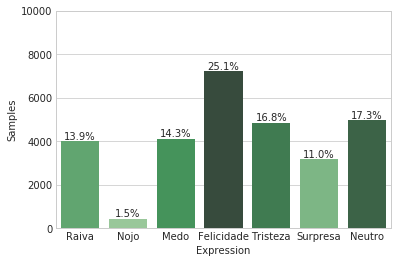

In [25]:
ax = sns.barplot(x, y, palette=pal)
ax.set(ylim=(0, 10000))
for p, percent in zip(ax.patches, percentage.values()):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 100, f'{percent*100:.1f}%', ha='center')
ax.set(xlabel='Expression', ylabel='Samples')

In [26]:
figure = ax.get_figure()
figure.savefig('../../overleaf/images/expression_distribution_training.png', dpi=400)

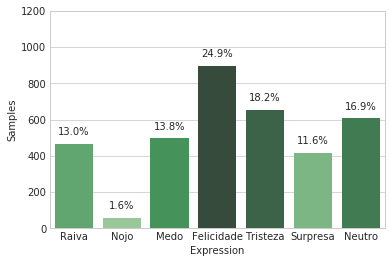

In [27]:
expression = {
    0 : 'Raiva',
    1 : 'Nojo',
    2 : 'Medo',
    3 : 'Felicidade',
    4 : 'Tristeza',
    5 : 'Surpresa',
    6 : 'Neutro'
}

df_validation_emotion = df_usage.get_group('PublicTest').groupby('emotion') 

expression_size = {}
for index, group in df_validation_emotion.groups.items():
    expression_size[expression[index]] = group.size

x, y = [], []
for label, size in expression_size.items():
    x.append(label)
    y.append(size)

total = np.sum(y)
percentage = {}
for expression, size in expression_size.items():
    percentage[expression] = size / total

pal = sns.color_palette("Greens_d", len(x))
rank = np.array(y).argsort().argsort()
pal = np.array(pal[::-1])[rank]

ax = sns.barplot(x, y, palette=pal)
ax.set(ylim=(0, 1200))
for p, percent in zip(ax.patches, percentage.values()):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 50, f'{percent*100:.1f}%', ha='center')
ax.set(xlabel='Expression', ylabel='Samples')

figure = ax.get_figure()
figure.savefig('../../overleaf/images/expression_distribution_validation.png', dpi=400)

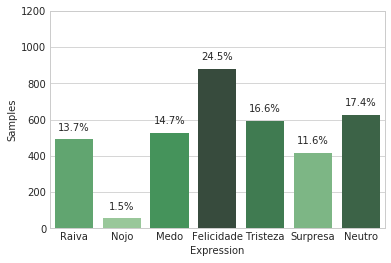

In [28]:
expression = {
    0 : 'Raiva',
    1 : 'Nojo',
    2 : 'Medo',
    3 : 'Felicidade',
    4 : 'Tristeza',
    5 : 'Surpresa',
    6 : 'Neutro'
}

df_test_emotion = df_usage.get_group('PrivateTest').groupby('emotion') 

expression_size = {}
for index, group in df_test_emotion.groups.items():
    expression_size[expression[index]] = group.size

x, y = [], []
for label, size in expression_size.items():
    x.append(label)
    y.append(size)

total = np.sum(y)
percentage = {}
for expression, size in expression_size.items():
    percentage[expression] = size / total

pal = sns.color_palette("Greens_d", len(x))
rank = np.array(y).argsort().argsort()
pal = np.array(pal[::-1])[rank]

ax = sns.barplot(x, y, palette=pal)
ax.set(ylim=(0, 1200))
for p, percent in zip(ax.patches, percentage.values()):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 50, f'{percent*100:.1f}%', ha='center')
ax.set(xlabel='Expression', ylabel='Samples')

figure = ax.get_figure()
figure.savefig('../../overleaf/images/expression_distribution_test.png', dpi=400)